In [1]:
import numpy as np
from glob import glob
import matplotlib
from matplotlib import pyplot as plt

import cv2

## Praktikum Bildverarbeitung
### Praktikumsversuch 1 – „Einführung in die Bildvorverarbeitung“
Ziel des Praktikums:
Eine Bilddatei soll in ihrem Wertebereich angepasst werden. Weiterhin werden ihre Grauwerte gespreizt und verschoben. So soll der zur Verfügung stehende Grauwertebereich optimal genutzt werden um die für den Anwendungsfall wichtigen Bildinformationen darzustellen.

### Bilddaten

In [2]:
imgData = glob('../../../pics/images_bv_kaschuba/bv_praktikum_01/*.*')

In [3]:
imgData

['../../../pics/images_bv_kaschuba/bv_praktikum_01/brain.bmp',
 '../../../pics/images_bv_kaschuba/bv_praktikum_01/brain_uint16.tif']

### Aufgabe 1
Nutzen Sie die Funktionen **cv2.imread(filename, cv2.IMREAD_UNCHANGED)** zum laden der Bilddatei **'brain_uint16.tif'** und **plt.imshow(image, cmap='gray')** zum darstellen des Bildes.

(width , height) = (256, 256)
dtype:  uint16


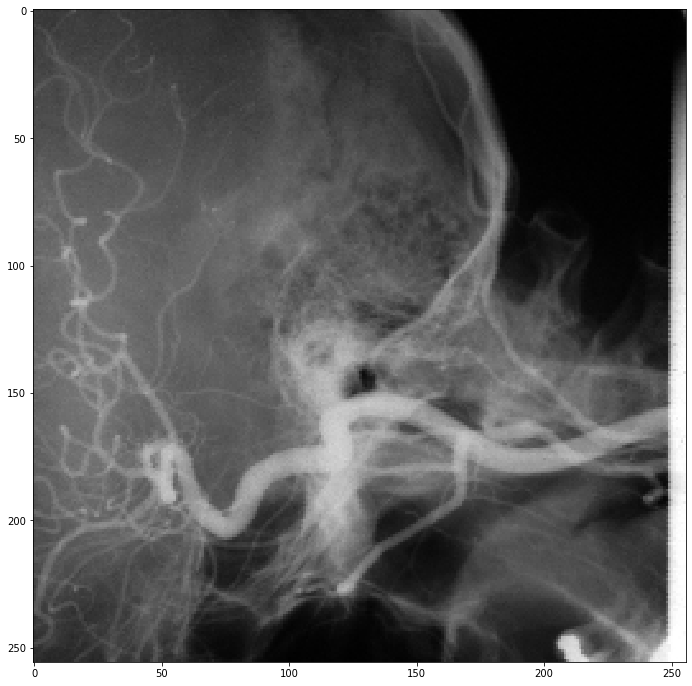

In [4]:
image = cv2.imread(imgData[1], cv2.IMREAD_UNCHANGED)
height, width = image.shape
print('(width , height) =', image.shape)
print('dtype: ', image.dtype)

# imshow
plt.figure(figsize=(12, 12))
plt.imshow(image, cmap='gray')

### Aufgabe 2
Fügen Sie die Funktion **cv2.calcHist** oder **np.histogram** hinzu, um das Histogramm zu berechnen. 
Beachten Sie, dass die Bilddatei **brain_uint16.tif** aus Grauwerten von 0 bis 65.535 besteht.

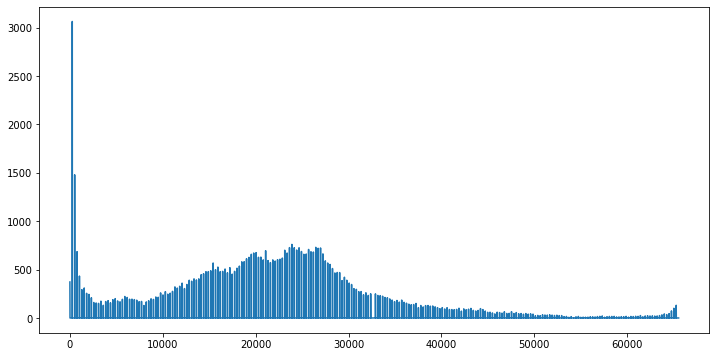

In [7]:
histogram_01, bin_edges = np.histogram(image, bins=65536, range=(0, 65535))

plt.figure(figsize=(12, 6))
plt.plot(histogram_01)
plt.show()


#hist = cv2.calcHist([image], [0], None, [65536], [0, 65536])
#plt.plot(hist, color='g')
#plt.xlim([0, 65536])
#plt.title('Image Histogram')

### Aufgabe 3
Ändern Sie den Wertebereich auf 0 bis 255 und nutzen Sie zum konvertieren des Array die Funktion uint8. Überprüfen Sie anschließend das Ergebnis mit einem Histogramm.

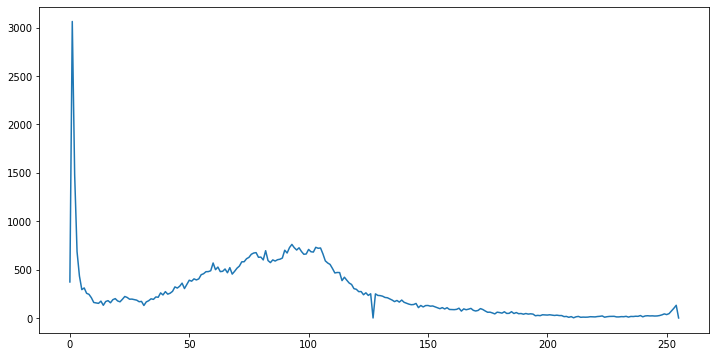

In [8]:
image_uint8 = (image/256).astype('uint8')
#plt.imshow(image_uint8, cmap='gray')

histogram_02, bin_edges = np.histogram(image_uint8, bins=256, range=(0, 255))
plt.figure(figsize=(12, 6))
plt.plot(histogram_02)
plt.show()

### Aufgabe 4
Setzen Sie alle Grauwerte, die kleiner als 40 oder größer als 120 sind, auf 0. Überprüfen Sie das Ergebnis mit einem Histogramm.

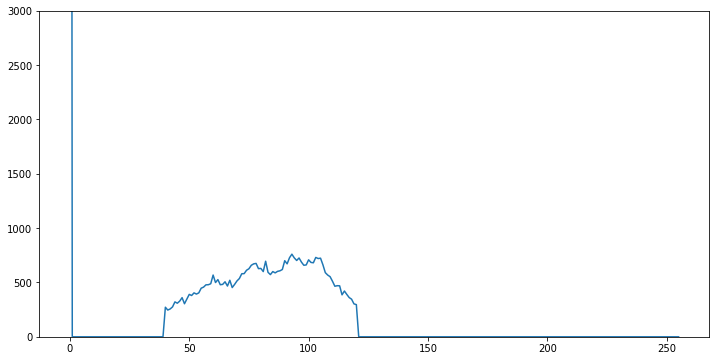

In [9]:
for i in range(height):
    for j in range(width):
        if image_uint8[i,j] < 40 or image_uint8[i,j] > 120:
            image_uint8[i,j] = 0
            

histogram_03, bin_edges = np.histogram(image_uint8, bins=256, range=(0, 255))
plt.figure(figsize=(12, 6))
plt.plot(histogram_03)
plt.ylim([0, 3000])
plt.show()

### Aufgabe 5
Betrachten Sie die Veränderungen mit der Funktion **plt.imshow**.

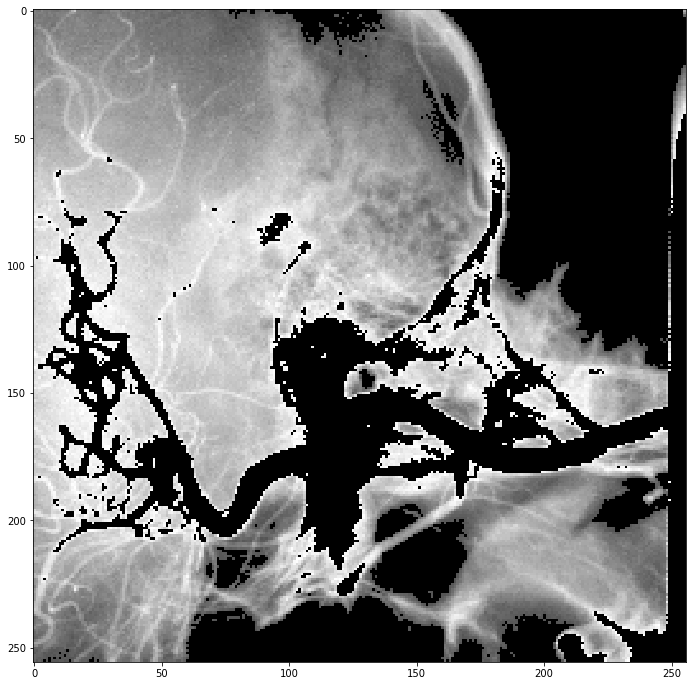

In [10]:
# imshow
plt.figure(figsize=(12, 12))
plt.imshow(image_uint8, cmap='gray')

### Aufgabe 6
Spreizen Sie das entstandene Bild auf, um wieder die gesamte Spanne von 0 bis 255 zu nutzen. Überprüfen Sie das Ergebnis mit einem Histogramm.

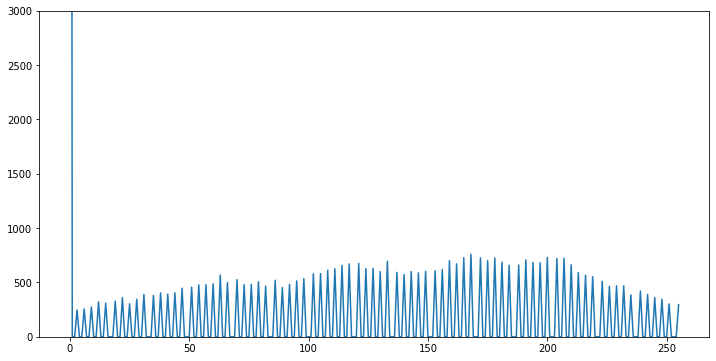

In [11]:
image_uint8_subtract = cv2.subtract(image_uint8,40)
image_uint8_new = (((image_uint8_subtract.astype('double'))/80.0)*255.0).astype('uint8')

histogram_04, bin_edges = np.histogram(image_uint8_new, bins=256, range=(0, 255))
plt.figure(figsize=(12, 6))
plt.plot(histogram_04)
plt.ylim([0, 3000])
plt.show()

### Aufgabe 6
Betrachten Sie die Veränderungen mit der Funktion **plt.imshow**.

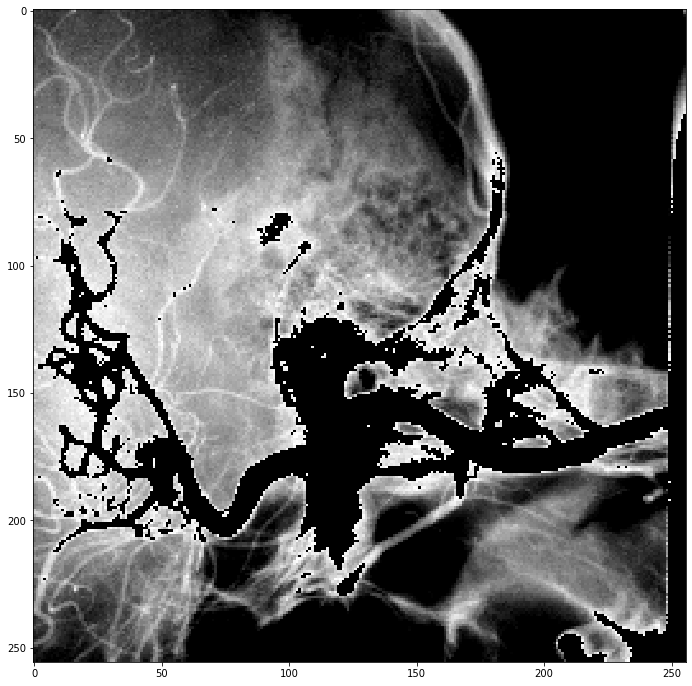

In [12]:
# imshow
plt.figure(figsize=(12, 12))
plt.imshow(image_uint8_new, cmap='gray')